In [7]:
from datarobot_ts_helpers import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Forecasting

In [8]:
import statsmodels.api as sm

data = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
data.index = pd.date_range(start='1712', end='2021', freq='A')

y_hist = data.loc['1986':'2010','SUNACTIVITY']     # size 25
y_future = data.loc['2011':,'SUNACTIVITY']         # size 10

h = len(y_hist)
f = len(y_future)

C:\Users\sspillane\AppData\Local\Temp\ipykernel_21760\3896911098.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  data.index = pd.date_range(start='1712', end='2021', freq='A')


### data

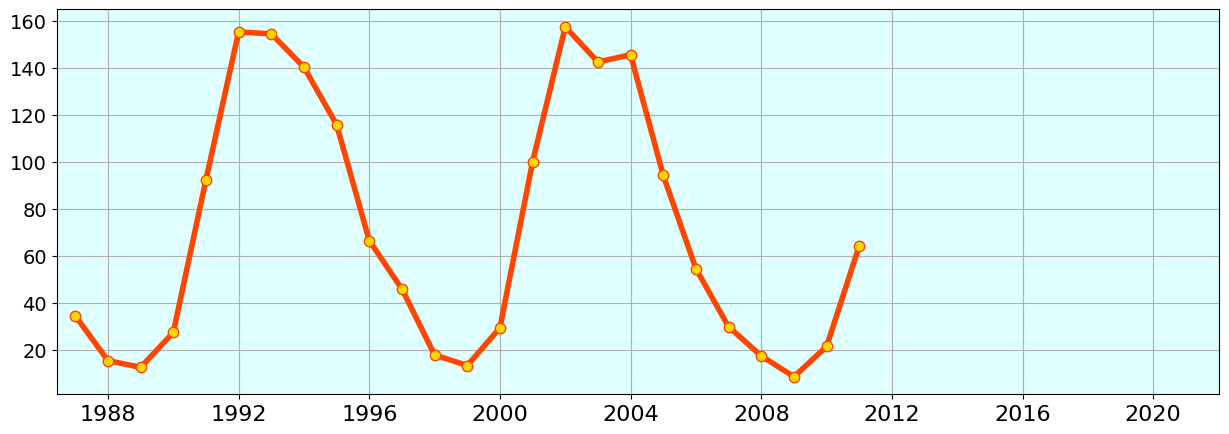

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('lightcyan')

plt.plot(y_hist,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')

plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.xlim((6000, 19000))

myylim = plt.ylim()

### train an model

In [10]:
period = 10
res = seasonal_decompose(y_hist,period=period,extrapolate_trend=True)

print(res.trend.size)
print(res.seasonal.size)

25
25


### make a forecast

In [11]:
y_forecast = res.trend
y_forecast = y_forecast.append(y_future)
y_forecast[-f:] = np.NaN

y_forecast.interpolate(method='linear',inplace=True)

y_forecast = y_forecast[-f:]
y_forecast = y_forecast + res.seasonal[y_forecast.index - pd.DateOffset(years=period)].values

AttributeError: 'Series' object has no attribute 'append'

In [12]:
y_future['2011-12-31'] = 135.0
y_future['2014-12-31'] = 81.0
y_future['2020-12-31'] = 45.0

### plot

C:\Users\sspillane\AppData\Local\Temp\ipykernel_21760\2325943613.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_forecast,'.-',


ValueError: operands could not be broadcast together with shapes (25,) (10,) 

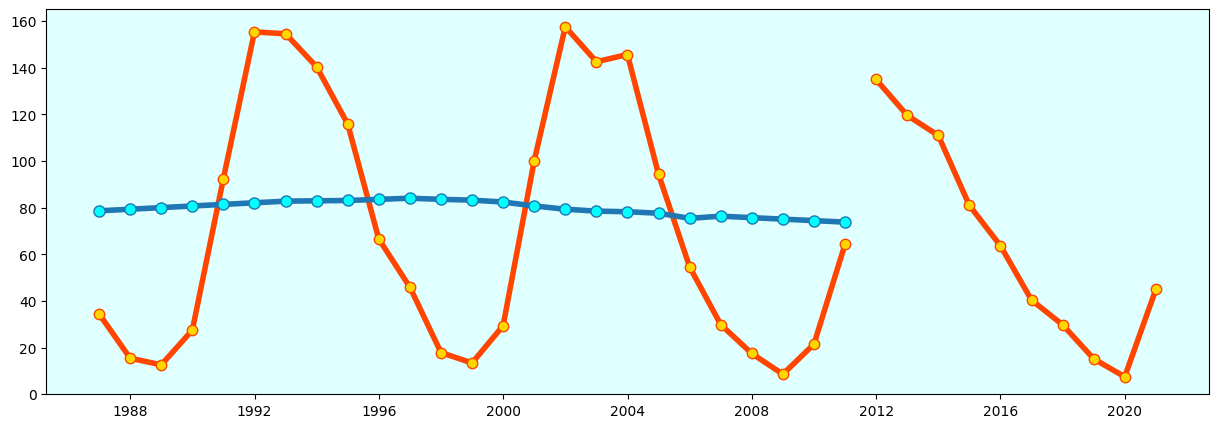

In [13]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('lightcyan')

plt.plot(y_hist,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')

plt.plot(y_future,'.-',
         markerfacecolor='gold',
         markersize=15,
         linewidth=4,
         color='orangered')

plt.plot(y_forecast,'.-',
         linewidth=4,marker='o',
         markerfacecolor='cyan',
         markersize=8)

plt.fill_between(y_forecast.index, y_forecast, y_future,color=(0.6,0.6,0.6))

plt.grid()
# ax.get_yaxis().set_visible(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.xlim((6000, 19000))
plt.ylim(myylim)

### evaluate error

In [14]:
forecast_error = y_future - y_forecast
e1 = forecast_error.abs().mean()
e2 = np.sqrt( forecast_error.pow(2).mean() )

print(e1, e2)

nan nan


# Simple forecasting

In [15]:
ar=[0.4,0.1]
ma=[0.9,0.4]
h = 100
f= 10

process = make_process(ar=ar,ma=ma) 
z = process.generate_sample(nsample=h)
time = np.linspace(0,h-1,h)
d = 10*np.cos(20 + time/10)
y_hist = z + d

time_pred = np.linspace(h,h+f,f)
y_forecast_const = np.full(f,y_hist[-1])
y_forecast_firstorder = y_hist[-1] + np.mean(np.diff(y_hist[-10:]))*(time_pred - h) 

NameError: name 'make_process' is not defined

Text(0.5, 0, 'time')

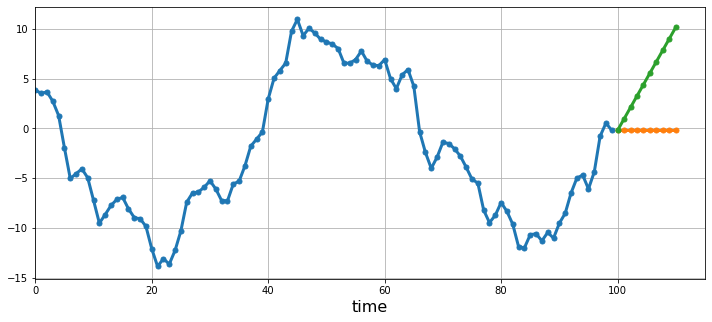

In [10]:
plt.figure(figsize=(12,5))
plt.plot(time,y_hist,
         '.-',
         markersize=10,
         linewidth=3)

plt.plot(time_pred,y_forecast_const,'.-',
         markersize=10,
         linewidth=3)

plt.plot(time_pred,y_forecast_firstorder, '.-',
         markersize=10,
         linewidth=3)
plt.xlim([0,115])
plt.grid()
plt.xlabel('time',fontsize=16)